In [1]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('metrics.csv', quotechar='"', escapechar='\\')
print(df.head())

                     Algorithm                      Metadata  \
0  Exponential Gap Elimination  {"Confidence":0.2,"Arms":10}   
1  Exponential Gap Elimination  {"Confidence":0.2,"Arms":10}   
2  Exponential Gap Elimination  {"Confidence":0.2,"Arms":10}   
3  Exponential Gap Elimination  {"Confidence":0.2,"Arms":10}   
4  Exponential Gap Elimination  {"Confidence":0.2,"Arms":10}   

                                             Rundata    Pulls  
0  {"Regret":0,"H1":635.155,"Optimal Mean":0.823672}   231176  
1  {"Regret":0,"H1":9461.69,"Optimal Mean":0.973213}  1998554  
2  {"Regret":0,"H1":25.3662,"Optimal Mean":0.985347}    86021  
3   {"Regret":0,"H1":426.71,"Optimal Mean":0.964833}   142800  
4  {"Regret":0,"H1":3360.81,"Optimal Mean":0.996123}   595167  


In [3]:
df_fixed_budget = df[df['Algorithm'].isin(["Successive Rejects", "Sequential Halving"])]
df_fixed_confidence = df[df['Algorithm'].isin(["Exponential Gap Elimination"])]

In [4]:
# Extract budget and regret information
df_fixed_budget['Arms'] = df_fixed_budget['Metadata'].apply(lambda x: eval(x)['Arms'])
df_fixed_budget['Regret'] = df_fixed_budget['Rundata'].apply(lambda x: eval(x)['Regret'])

# Group by Algorithm and Budget
grouped = df_fixed_budget.groupby(['Algorithm', 'Arms'])

# Calculate accuracy
accuracy = grouped.apply(lambda x: (x['Regret'] == 0).sum() / len(x)).reset_index(name='Accuracy')

print(accuracy)


             Algorithm  Arms  Accuracy
0   Sequential Halving     5     0.946
1   Sequential Halving    10     0.909
2   Sequential Halving    15     0.885
3   Sequential Halving    20     0.845
4   Sequential Halving    25     0.845
5   Sequential Halving    30     0.802
6   Sequential Halving    35     0.814
7   Sequential Halving    40     0.783
8   Successive Rejects     5     0.934
9   Successive Rejects    10     0.887
10  Successive Rejects    15     0.853
11  Successive Rejects    20     0.828


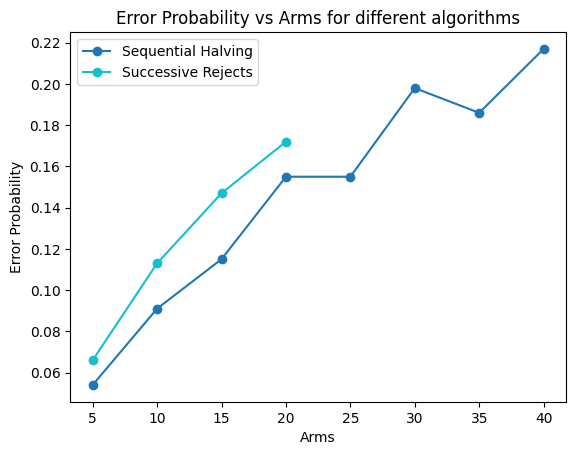

In [5]:

# Calculate error probability
df_fixed_budget['Error'] = df_fixed_budget['Regret'] != 0

# Group by Algorithm and Budget
grouped = df_fixed_budget.groupby(['Algorithm', 'Arms'])

# Calculate error probability
error_prob = grouped['Error'].mean().reset_index()

# Plot error probability vs Budget for each algorithm
colors = plt.cm.get_cmap('tab10', len(df_fixed_budget['Algorithm'].unique()))

for i, (algorithm, group) in enumerate(error_prob.groupby('Algorithm')):
    plt.plot(group['Arms'], group['Error'], label=algorithm, color=colors(i), marker='o')

plt.title('Error Probability vs Arms for different algorithms')
plt.xlabel('Arms')
plt.ylabel('Error Probability')
plt.legend()
plt.show()

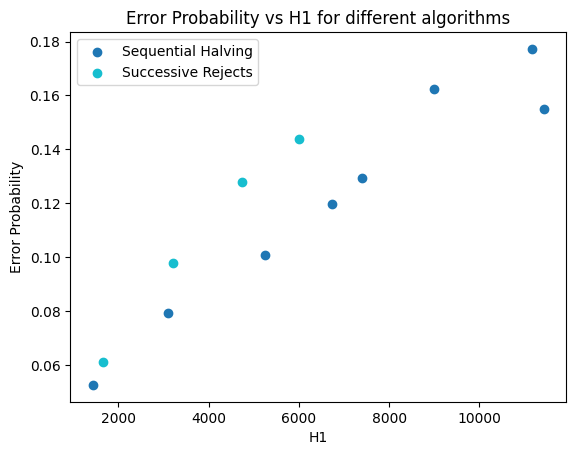

In [6]:
# Extract H1 information
df_fixed_budget['H1'] = df_fixed_budget['Rundata'].apply(lambda x: eval(x)['H1'])

# Filter for H1 values less than 10^5
df_filtered = df_fixed_budget[df_fixed_budget['H1'] < 10**5]

# Group by Algorithm and Arms
grouped = df_filtered.groupby(['Algorithm', 'Arms'])

# Calculate mean H1 and error probability
h1_error_prob = grouped.agg({'H1': 'mean', 'Error': 'mean'}).reset_index()

# Plot error probability vs H1 for each algorithm
colors = plt.cm.get_cmap('tab10', len(df_filtered['Algorithm'].unique()))

for i, (algorithm, group) in enumerate(h1_error_prob.groupby('Algorithm')):
    plt.scatter(group['H1'], group['Error'], label=algorithm, color=colors(i), marker='o')

plt.title('Error Probability vs H1 for different algorithms')
plt.xlabel('H1')
plt.ylabel('Error Probability')
plt.legend()
plt.show()

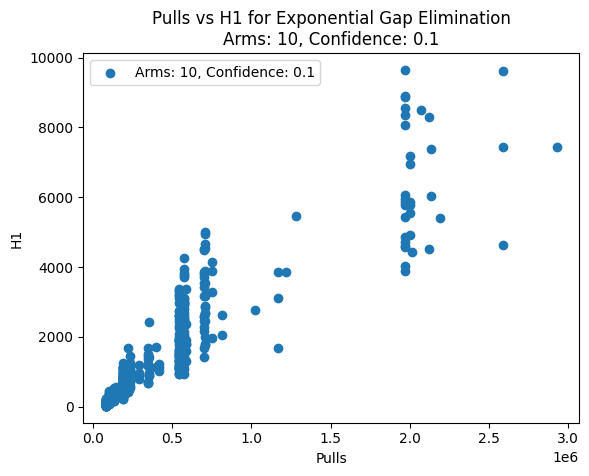

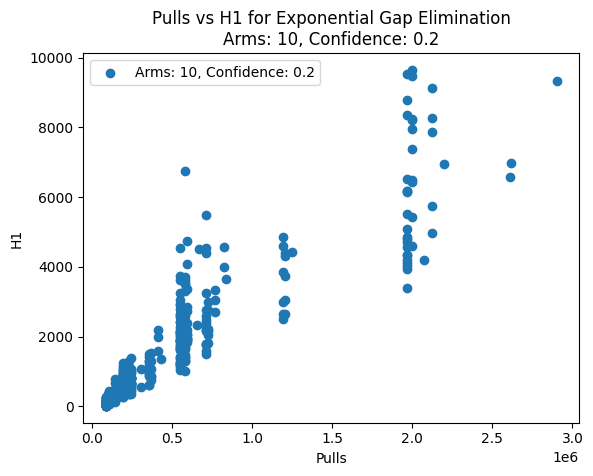

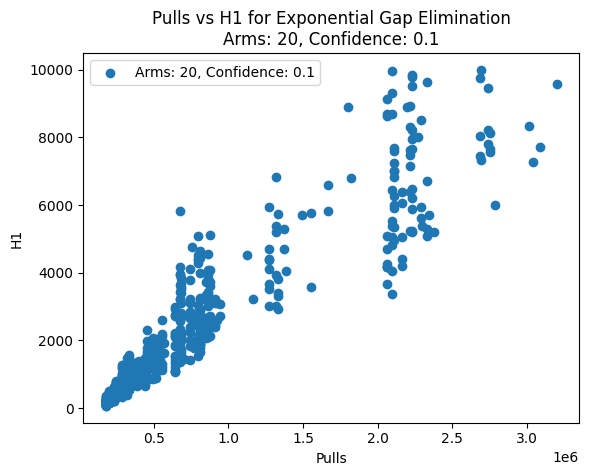

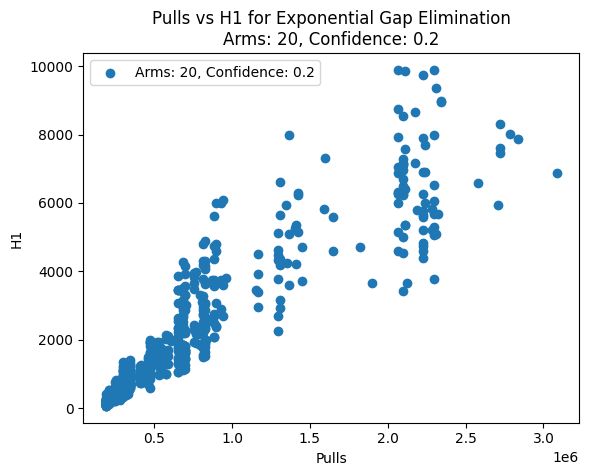

In [7]:
# Extract H1 information
# Extract budget and regret information
df_fixed_confidence['Arms'] = df_fixed_confidence['Metadata'].apply(lambda x: eval(x)['Arms'])
df_fixed_confidence['Confidence'] = df_fixed_confidence['Metadata'].apply(lambda x: eval(x)['Confidence'])
df_fixed_confidence['Regret'] = df_fixed_confidence['Rundata'].apply(lambda x: eval(x)['Regret'])
df_fixed_confidence['H1'] = df_fixed_confidence['Rundata'].apply(lambda x: eval(x)['H1'])

# Group by Algorithm and Budget
grouped = df_fixed_confidence.groupby(['Arms', 'Confidence'])

# Plot Pulls vs H1 for each algorithm in different graphs
colors = plt.cm.get_cmap('tab10', len(df_fixed_confidence['Algorithm'].unique()))

for (arms, confidence), group in grouped:
    plt.figure()
    plt.scatter(group['Pulls'], group['H1'], label=f'Arms: {arms}, Confidence: {confidence}', color=colors(0))
    plt.title(f'Pulls vs H1 for Exponential Gap Elimination\nArms: {arms}, Confidence: {confidence}')
    plt.xlabel('Pulls')
    plt.ylabel('H1')
    plt.legend()
    plt.show()